# Problem Statement

$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$

$$u\bigg|_{x = 0} = u\bigg|_{x = 1} = 0,\;u\bigg|_{t = 0} = \sin{\pi x}$$

# Precise Solution

* Searching Eigenvalues $\lambda_n$ and Eigenfunctions $\mathcal{X}_n$ of $\cfrac{d^2}{dx^2}$ operator:

$$\frac{d^2\mathcal{X}}{dx^2} + \lambda\mathcal{X} = 0 \Longrightarrow 
\mathcal{X} = A\cos{\sqrt{\lambda}x} + B\sin{\sqrt{\lambda}x}$$

* Using boundary conditions:

$$\mathcal{X}\bigg|_{x = 0} = A = 0,\;\mathcal{X}\bigg|_{x = 1} = B\sin{\sqrt{\lambda}} = 0 \Longrightarrow 
\sqrt{\lambda}_n = \pi n,\;\mathcal{X}_n = \sin{\sqrt{\lambda}_n x} = \sin{\pi n x}$$

<!-- 
* Determining norm of $\mathcal{X}_n$ basis functions:

$$(\mathcal{X}_n, \mathcal{X}_n) = \int\limits_0^1 \sin^2{\pi n x}dx = 
\int\limits_0^1 \left[\cos{2\pi n x} + \frac{1}{2}\right]dx = \int\limits_0^1 \cos{2\pi n x}\,dx + 
\frac{1}{2}\int\limits_0^1 dx = \frac{1}{2\pi n}\sin{2\pi n x}\Bigg|_0^1 + \frac{1}{2} = \frac{1}{2} 
\Longrightarrow \|\mathcal{X}_n\| = \frac{1}{\sqrt{2}}$$ -->

* Expanding initial condition:

$$u\bigg|_{t = 0} = \sin{\pi x} = \mathcal{X}_1$$

* Searching coefs $u_n$:

$$u(x, t) = \sum\limits_{n = 1}^{\infty} u_n\mathcal{X}_n$$

$$\frac{\partial u}{\partial t} = \sum\limits_{n = 1}^{\infty} \frac{du_n}{dt}\mathcal{X}_n,\;
\frac{\partial^2 u}{\partial x^2} = 
\sum\limits_{n = 0}^{\infty} u_n\frac{d^2\mathcal{X}_n}{dx^2} = 
-\sum\limits_{n = 0}^{\infty} u_n\lambda_n\mathcal{X}_n$$

$$\frac{du_n}{dt} + \lambda_n u_n = 0 \Longrightarrow u_n = C_n e^{-\lambda_n t}$$

$$u_n\bigg|_{t = 0} = C_n e^{-\lambda_n t}\bigg|_{t = 0} = C_n = 
\begin{cases}1,\;n = 1\\[5pt]
0,\;\text{otherwise}\end{cases}$$

* Uniting result function:

$$u(x, t) = e^{-\pi^2 t}\sin{\pi x}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from scipy import linalg

In [2]:
u = lambda x, t: np.exp(-np.pi ** 2 * t) * np.sin(np.pi * x)

# Numerical Solution

* Iteration scheme

$$\frac{y_j^{n + 1} - y_j^n}{\tau} = \frac{y^{n + 1}_{j + 1} - 2y^{n + 1}_j + y^{n + 1}_{j - 1}}{h^2} 
\Longrightarrow \gamma y_{j + 1}^{n + 1} - (1 + 2\gamma)y_j^{n + 1} + \gamma y_{j - 1}^{n + 1} = -y_j^n,\;
\gamma = \frac{\tau}{h^2}$$

* On each time layer:
$$\gamma x_{j + 1} - (1 + 2\gamma)x_j + \gamma x_{j - 1} = -z_j$$

$$x_j = y_j^{n + 1},\;z_j = y_j^n$$

* The equation system is defined as:

$$\mathbf{A} = \begin{bmatrix}-(1 + 2\gamma) & \gamma & 0 & \dots & 0 & 0 \\
\gamma & -(1 + 2\gamma) & \gamma & \dots & 0 & 0 \\
0 & \gamma & -(1 + 2\gamma) & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \dots & \gamma & -(1 + 2\gamma) \\
\end{bmatrix},\;
\mathbf{z} = \begin{bmatrix}
-z_1 - \gamma x_0 \\ 
-z_2 \\
-z_3 \\
\vdots \\
-z_{N - 1} - \gamma x_N
\end{bmatrix}$$

$$\mathbf{A} \in \mathbf{M}^{N - 1\,\times\,N - 1},\;
\mathbf{z} \in \mathbf{M}^{N - 1\,\times\,1},\;
\mathbf{x} \in \mathbf{M}^{N - 1\,\times\,1},\;
\mathbf{A}\mathbf{x} = \mathbf{z}$$

In [3]:
def integrate_heat_equation(tau, h):
    # boundary conditions
    left = right = 0.
    
    # initial condition
    init = lambda x: np.sin(np.pi * x)
    
    # grid function
    N, K = int(1 / h), int(0.5 / tau)
    ys = np.zeros((K + 1, N + 1))
    
    # independent values
    xs, ts = np.linspace(0, 1, N + 1), np.linspace(0, 0.5, K + 1)
    gamma = tau / (h ** 2)
    
    # setting boudary conditions
    ys[:, 0], ys[:, N] = left, right
    
    # propagation through layers
    for n in range(K + 1):
        
        # case of initial condition
        if n == 0:
            ys[n, :] = init(xs)
        # general case
        else:    
            # preparing right part
            z = -ys[n - 1, 1: N]
            z[0] -= gamma * ys[n - 1, 0]; z[-1] -= gamma * ys[n - 1, N]

            # preparing left part
            A = np.zeros((3, N - 1))
            A[0, 1:] = gamma * np.ones(N - 2)
            A[1, :] = -(1 + 2 * gamma) * np.ones(N - 1)
            A[2, : -1] = gamma * np.ones(N - 2)

            # solving three diagonal system using Thomas algorithm
            values = linalg.solve_banded((1, 1), A, z)
            ys[n, 1: N] = values
                
    return xs, ts, ys

* Stability condition of method: `ABSOLUTELY STABLE!`

# Approximation Order Investigation

Should be $O(\tau) + O(h^2)$ — the same is proved and observed:

In [4]:
def root_mean_squared_error(xs, ts, evaluated, function):
    Xs, Ts = np.meshgrid(xs, ts)
    precise = function(Xs, Ts)
    
    return np.sqrt(np.mean(np.power(evaluated - precise, 2)))

In [5]:
def mean_absolute_error(xs, ts, evaluated, function):
    Xs, Ts = np.meshgrid(xs, ts)
    precise = function(Xs, Ts)
    
    return np.mean(np.abs(evaluated - precise))

* With respect to $\tau$

In [6]:
# step size
tau, h = 0.005, 0.005

In [7]:
for coef in [1, 2, 4]:
    xs, ts, ys = integrate_heat_equation(tau / coef, h)
    print('MAE for tau = {:.5f} equals to {:.5f}'.format(tau / coef, mean_absolute_error(xs, ts, ys, u)))

MAE for tau = 0.00500 equals to 0.00298
MAE for tau = 0.00250 equals to 0.00150
MAE for tau = 0.00125 equals to 0.00076


* With respect to $h$

In [8]:
# step size
tau, h = 0.0001, 0.4

In [9]:
for coef in [1, 2, 4]:
    xs, ts, ys = integrate_heat_equation(tau, h / coef)
    print('MAE for h = {:.1f} equals to {:.5f}'.format(h / coef, mean_absolute_error(xs, ts, ys, u)))

MAE for h = 0.4 equals to 0.01380
MAE for h = 0.2 equals to 0.00338
MAE for h = 0.1 equals to 0.00097


# Solution Plots

In [10]:
# step size
tau, h = 0.005, 0.005
xs, ts, ys = integrate_heat_equation(tau, h)

### Precise Solution

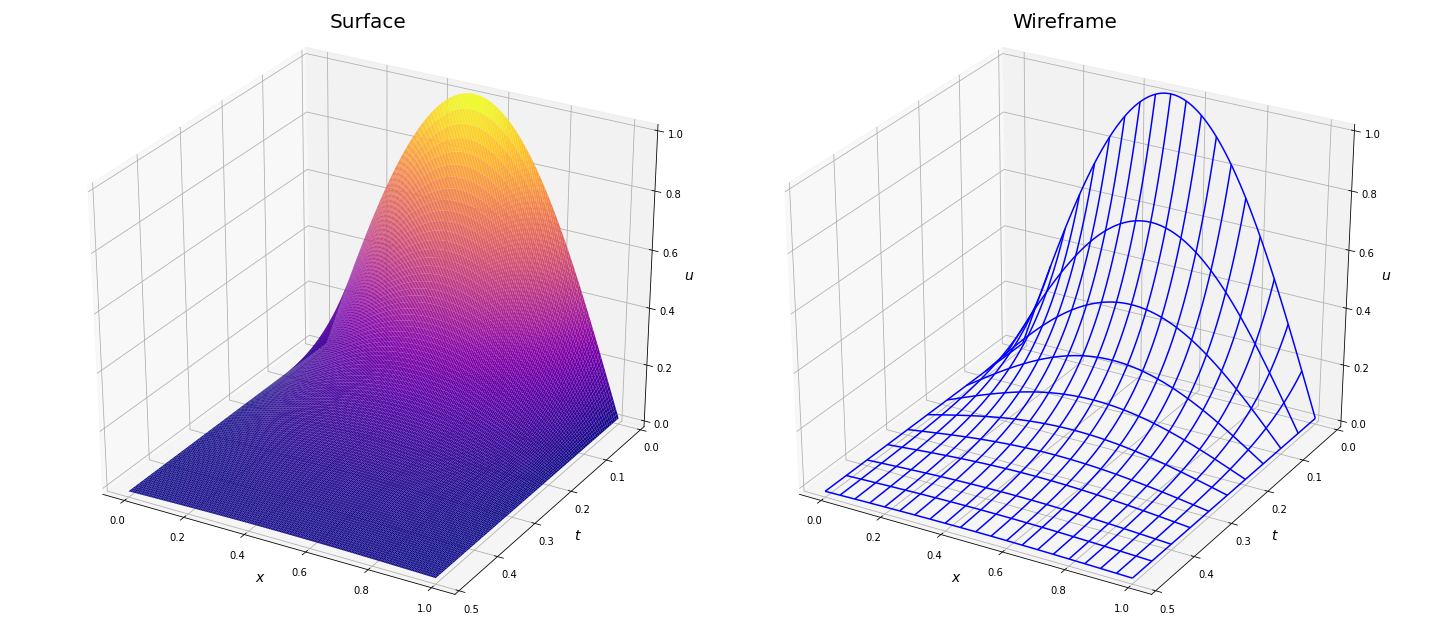

In [11]:
fig = plt.figure(figsize=(20, 9))

# precise surface
Xs, Ts = np.meshgrid(xs, ts)
Ys = u(Xs, Ts)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.set_title('Surface', fontsize=20, y=1.04)
ax.zaxis.set_rotate_label(False)

ax.plot_surface(Xs, Ts, Ys, rstride=1, cstride=1, cmap='plasma')
ax.set_ylim(0.5, 0)

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$t$', fontsize=14)
ax.set_zlabel('$u$', fontsize=14)

# precise wireframe
ax = plt.subplot(1, 2, 2, projection='3d')
ax.set_title('Wireframe', fontsize=20, y=1.04)
ax.zaxis.set_rotate_label(False)

ax.plot_wireframe(Xs, Ts, Ys, rstride=10, cstride=10, color='blue')
ax.set_ylim(0.5, 0)

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$t$', fontsize=14)
ax.set_zlabel('$u$', fontsize=14)

plt.tight_layout(w_pad=-2.5)
# plt.show()
plt.savefig('heat_equation.png')

### Numerical Solution

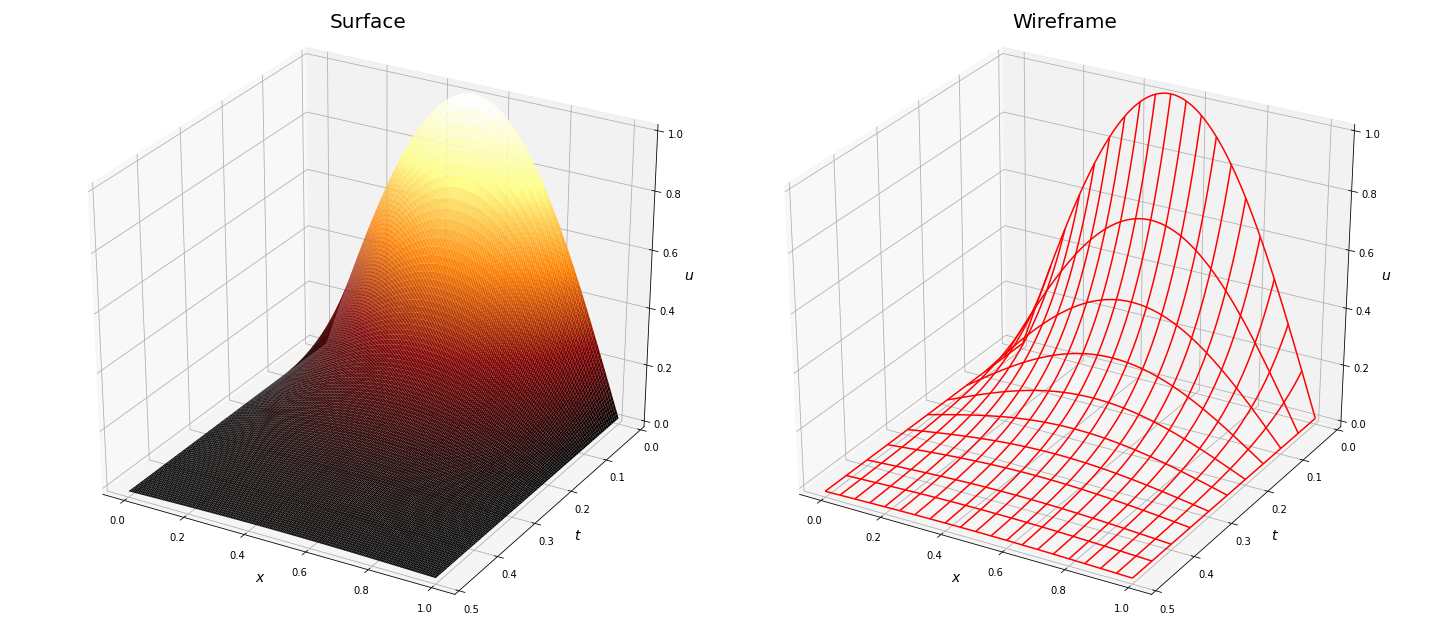

In [12]:
fig = plt.figure(figsize=(20, 9))

# numerical surface
Xs, Ts = np.meshgrid(xs, ts)
Ys = ys

ax = plt.subplot(1, 2, 1, projection='3d')
ax.set_title('Surface', fontsize=20, y=1.04)
ax.zaxis.set_rotate_label(False)

ax.plot_surface(Xs, Ts, Ys, rstride=1, cstride=1, cmap='afmhot')
ax.set_ylim(0.5, 0)

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$t$', fontsize=14)
ax.set_zlabel('$u$', fontsize=14)

# numerical wireframe
ax = plt.subplot(1, 2, 2, projection='3d')
ax.set_title('Wireframe', fontsize=20, y=1.04)
ax.zaxis.set_rotate_label(False)

ax.plot_wireframe(Xs, Ts, Ys, rstride=10, cstride=10, color='red')
ax.set_ylim(0.5, 0)

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$t$', fontsize=14)
ax.set_zlabel('$u$', fontsize=14)

plt.tight_layout(w_pad=-2.5)
plt.show()